In [1]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

2024-01-04 21:28:31.013635: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-04 21:28:31.049154: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 21:28:31.173626: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-04 21:28:31.173656: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-04 21:28:31.174311: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
df = pd.read_csv("../../datasets/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

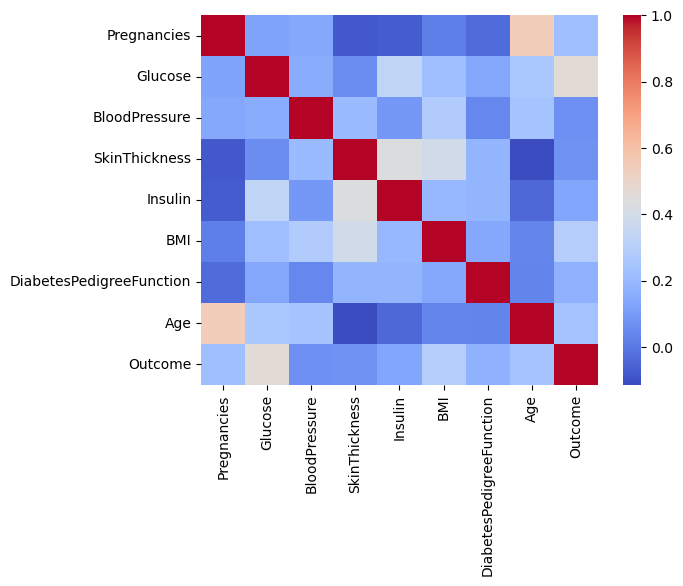

In [3]:
correlation = df.corr()
sns.heatmap(correlation, cmap="coolwarm")

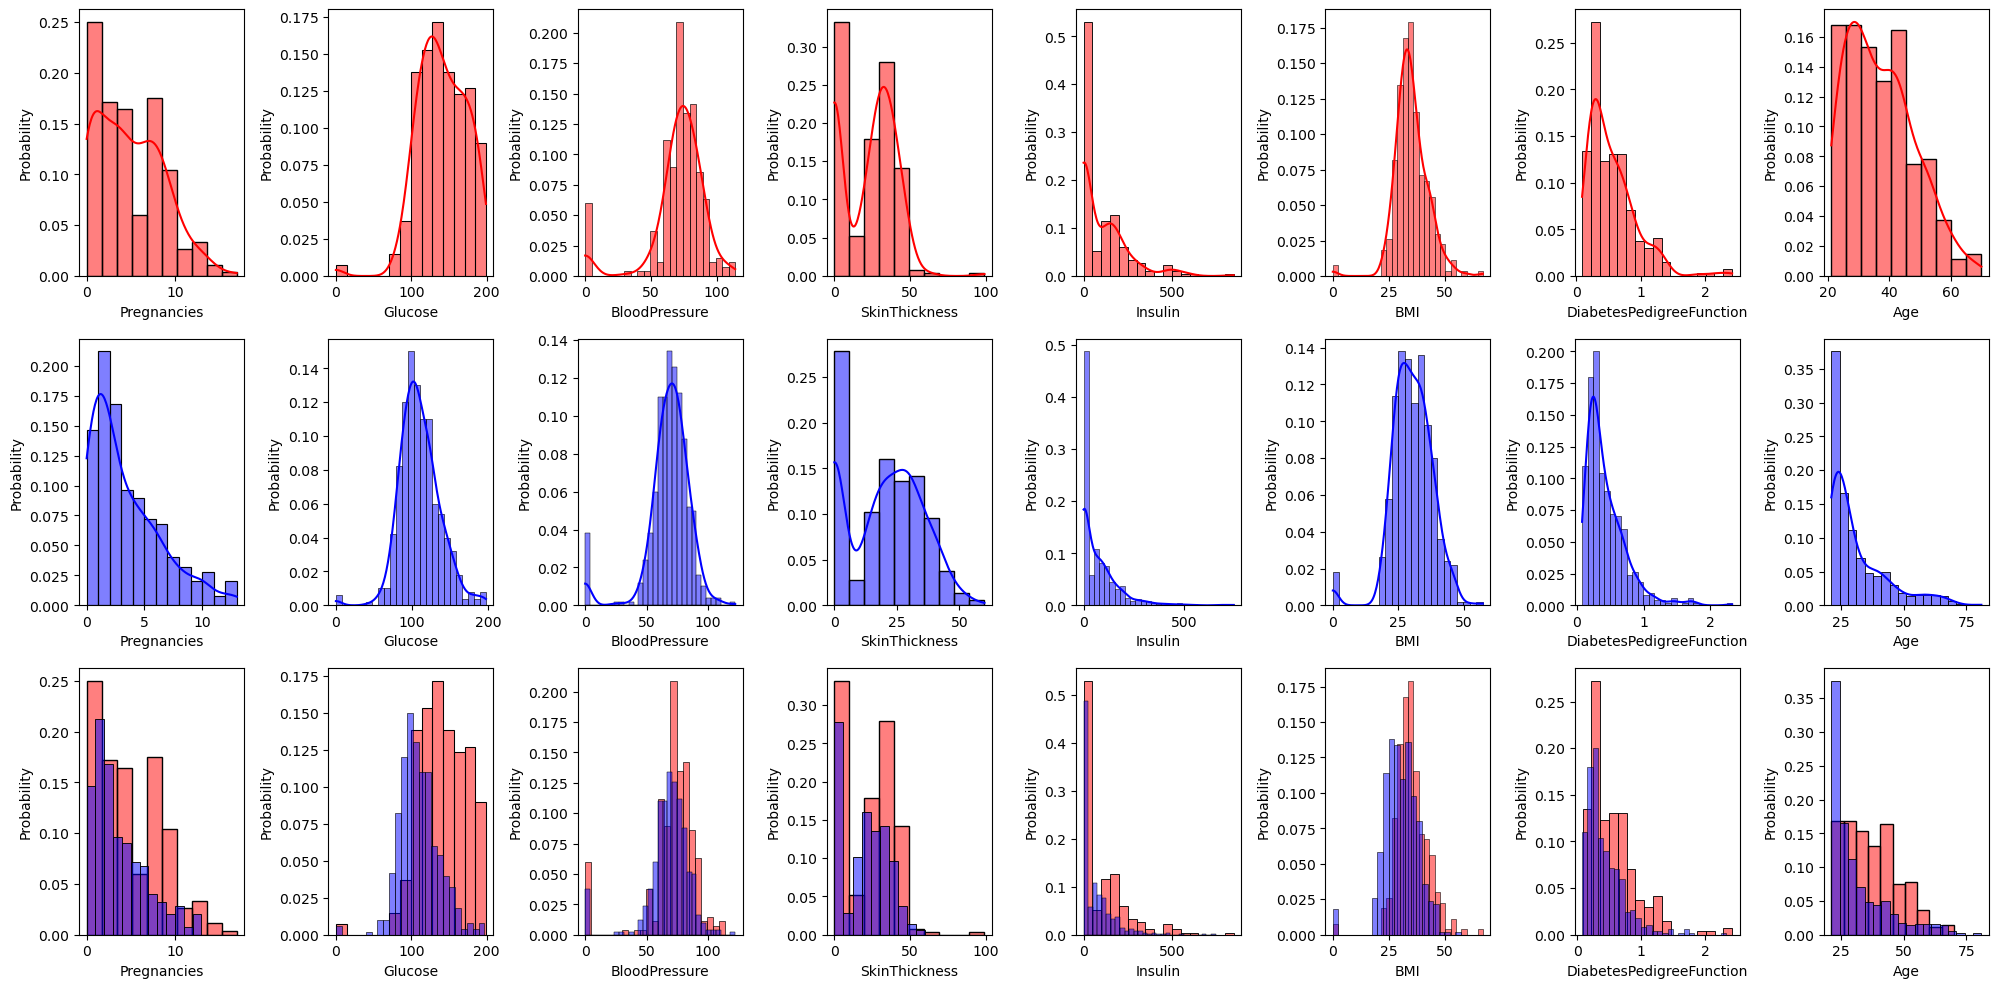

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=8, figsize=((20, 10)))
for i in range(8):
    label = df.columns[i]
    sns.histplot(df[df["Outcome"]==1][label], color='red', ax=axes[0, i], kde=True, stat="probability")
    sns.histplot(df[df["Outcome"]==1][label], color='red', ax=axes[2, i], alpha=0.5, stat="probability")

    sns.histplot(df[df["Outcome"]==0][label], color='blue', ax=axes[1, i], kde=True, stat="probability")
    sns.histplot(df[df["Outcome"]==0][label], color='blue', ax=axes[2, i], alpha=0.5, stat="probability")
plt.tight_layout()

In [5]:
x = df[df.columns[:-1]].values
y = df["Outcome"].values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
def splitData(data, train_size, val_size, random_state=None):
    data_train, data_temp = train_test_split(data, train_size=train_size, random_state=random_state)
    data_val, data_test = train_test_split(data_temp, train_size=(val_size)/(1.0-train_size), random_state=random_state)
    return data_train, data_val, data_test

In [8]:
x_train, x_val, x_test = splitData(x, train_size=0.7, val_size=0.2)
y_train, y_val, y_test = splitData(y, train_size=0.7, val_size=0.2)

In [9]:
model = keras.Sequential([
    keras.layers.Dense(units=8, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid'),
])

In [10]:
model.compile(loss=keras.losses.binary_crossentropy,
               optimizer=keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

In [11]:
model.evaluate(x_train, y_train)

17/17 [==============================] - 0s 1ms/step - loss: 1.5949 - accuracy: 0.6350


[1.5948699712753296, 0.6350092887878418]

In [12]:
model.fit(x_train, y_train,
          validation_data=(x_val, y_val),
          epochs=30,
          batch_size=16)

Epoch 1/30
34/34 [==============================] - 1s 2ms/step - loss: 0.9325 - accuracy: 0.5587 - val_loss: 0.6404 - val_accuracy: 0.6753
Epoch 2/30
34/34 [==============================] - 0s 1ms/step - loss: 0.6722 - accuracy: 0.6145 - val_loss: 0.6581 - val_accuracy: 0.6753
Epoch 3/30
34/34 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.6257 - val_loss: 0.6356 - val_accuracy: 0.6753
Epoch 4/30
34/34 [==============================] - 0s 1ms/step - loss: 0.6521 - accuracy: 0.6443 - val_loss: 0.6816 - val_accuracy: 0.5779
Epoch 5/30
34/34 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.6406 - val_loss: 0.6289 - val_accuracy: 0.6688
Epoch 6/30
34/34 [==============================] - 0s 1ms/step - loss: 0.6510 - accuracy: 0.6313 - val_loss: 0.6425 - val_accuracy: 0.6558
Epoch 7/30
34/34 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.6276 - val_loss: 0.6401 - val_accuracy: 0.6688
Epoch 8/30
34/34 [==

In [13]:
from sklearn.preprocessing import StandardScaler
standerScaler = StandardScaler()

In [14]:
x_transformed = standerScaler.fit_transform(x)
x, x_transformed

(array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]]),
 array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
          0.46849198,  1.4259954 ],
        [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
         -0.36506078, -0.19067191],
        [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
          0.60439732, -0.10558415],
        ...,
        [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
         -0.68519336, -0.27575966],
        [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
         -0.37110101,  1.17073215],
        [-0.84488505, -0.8730192 ,  0.04624525, 

In [15]:
x_train, x_val, x_test = splitData(x_transformed, train_size=0.7, val_size=0.2)
y_train, y_val, y_test = splitData(y, train_size=0.7, val_size=0.2)

In [16]:
len(df[df["Outcome"]==1]), len(df[df["Outcome"]==0])

(268, 500)

In [17]:
!pip install -U imbalanced-learn

In [18]:
from imblearn.over_sampling import RandomOverSampler

In [19]:
randomOverSampler = RandomOverSampler()
x, y = randomOverSampler.fit_resample(x, y)

In [20]:
new_df = pd.DataFrame(np.hstack((x, np.reshape(y, (-1, 1)))), columns=df.columns)
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
995,4.0,146.0,92.0,0.0,0.0,31.2,0.539,61.0,1.0
996,11.0,111.0,84.0,40.0,0.0,46.8,0.925,45.0,1.0
997,3.0,174.0,58.0,22.0,194.0,32.9,0.593,36.0,1.0
998,7.0,194.0,68.0,28.0,0.0,35.9,0.745,41.0,1.0


In [21]:
len(new_df[new_df["Outcome"]==1]), len(new_df[new_df["Outcome"]==0])

(500, 500)

In [22]:
new_x, new_y = new_df.iloc[:, :-1], new_df.iloc[:, -1]

In [23]:
new_x = standerScaler.fit_transform(new_x)

In [24]:
x_train, x_val, x_test = splitData(new_x, train_size=0.7, val_size=0.2, random_state=1)
y_train, y_val, y_test = splitData(new_y, train_size=0.7, val_size=0.2, random_state=1)

In [25]:
model = keras.Sequential([
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])

In [26]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=30)

Epoch 1/30


22/22 [==============================] - 1s 7ms/step - loss: 0.5818 - accuracy: 0.7057 - val_loss: 0.5892 - val_accuracy: 0.7100
Epoch 2/30
22/22 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.7471 - val_loss: 0.5319 - val_accuracy: 0.6900
Epoch 3/30
22/22 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.7614 - val_loss: 0.5008 - val_accuracy: 0.7350
Epoch 4/30
22/22 [==============================] - 0s 2ms/step - loss: 0.4719 - accuracy: 0.7643 - val_loss: 0.5521 - val_accuracy: 0.7300
Epoch 5/30
22/22 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.7814 - val_loss: 0.5126 - val_accuracy: 0.7650
Epoch 6/30
22/22 [==============================] - 0s 2ms/step - loss: 0.4434 - accuracy: 0.7943 - val_loss: 0.5286 - val_accuracy: 0.7450
Epoch 7/30
22/22 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.7986 - val_loss: 0.5253 - val_accuracy: 0.7550
Epoch 8/30
22/22 [=============

In [27]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.8009 - accuracy: 0.7700


[0.8008999824523926, 0.7699999809265137]